## Insuring that the good python version is installed

In [50]:
import sys
if sys.version_info[0:2] != (3, 12 ):
    raise Exception('Requires python 3.12')

### Importing all useful libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
import joblib
import os

### Importing the dataset

In [52]:
current_directory = os.getcwd()
data_folder = os.path.join(current_directory, '..', 'data')
data_file_path = os.path.join(data_folder, 'TAIPEI_diabetes.csv')

In [53]:

df= pd.read_csv(data_file_path , index_col = "PatientID")

### Dataset exploration

In [54]:
df.shape

(15000, 9)

In [55]:
print(df.columns)

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')


In [56]:
df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,0
1147438,8,92,93,47,36,21.240576,0.158365,23,0
1640031,7,115,47,52,35,41.511523,0.079019,23,0
1883350,9,103,78,25,304,29.582192,1.282870,43,1
1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [57]:
df.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


There is no NA in any of the feature values meaning that the data is "relatively" clean.

In [58]:
num_dup=df.index.duplicated().sum()
print(f'Number of duplicated IDs in PatientID: {num_dup}')

Number of duplicated IDs in PatientID: 105


In [59]:
df.loc[df.index[df.index.duplicated()].unique()].head(50)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,,,,,,,,,
1429759,8,92,67,48,171,36.300158,0.153597,39,1
1429759,1,113,65,20,73,45.593722,0.768987,46,1
1149892,0,126,52,43,35,21.173514,0.268624,23,0
1149892,6,148,55,11,22,27.019037,0.300583,55,0
1861748,2,170,64,42,97,26.643396,0.195699,41,1
1861748,10,138,53,45,195,43.715952,0.260733,25,0
1033352,0,157,97,34,221,36.263025,0.182434,60,0
1033352,9,111,100,8,79,31.445866,0.283731,38,1
1806908,1,111,81,31,191,20.204120,0.096086,22,0


When examining the first 20 duplicates, we observed that only the IDs are duplicated, while the feature values differ. 
This variation indicates that these are not exact duplicates.  

Showing the count and average number of pregnancies for cases where pregnancies exceed 3 in the dataset.

In [60]:
df.loc[df.Pregnancies >= 3].describe().loc[['count', 'mean']]

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000
mean,6.396774,110.154692,72.158211,29.895455,154.299707,32.576146,0.429397,32.318915,0.578152


Showing the count and average number of pregnancies for cases where pregnancies exceed 11 in the dataset.

In [61]:
df.loc[df.Pregnancies > 11].describe().loc[['count', 'mean']]

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0
mean,12.819355,115.883871,73.354839,34.129032,194.864516,35.319763,0.517137,36.851613,1.0


Showing the count and average number of pregnancies for cases where number of pregnancies is 0 in the dataset.

In [62]:
df.loc[df.Pregnancies == 0].describe().loc[['count', 'mean']]

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,4377.0,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000
mean,0.0,105.003655,69.937172,27.365776,114.208362,30.065794,0.356197,27.290153,0.012109


Displaying the count and mean BMI for individuals with a BMI below 25 in the dataset.

In [63]:
df.loc[df.BMI<25].describe().loc[['count', 'mean']]

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,5416.00000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000
mean,2.54062,106.175222,70.667836,27.741507,122.049114,20.542919,0.369461,28.196824,0.103582


Displaying the count and mean BMI for individuals with a BMI above 30 in the dataset.

In [64]:
df.loc[df.BMI>=30].describe().loc[['count', 'mean']]

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,8248.000000,8248.000000,8248.000000,8248.000000,8248.000000,8248.000000,8248.00000,8248.000000,8248.000000
mean,3.469932,108.252546,71.370999,29.134093,143.344447,39.316327,0.41089,30.740907,0.411857


Displaying the count and mean SerumInsulin for individuals with a SerumInsulin below 16 in the dataset.

In [65]:
df.loc[df.SerumInsulin<16].describe().loc[['count', 'mean']]

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,2.577855,104.982699,68.951557,28.965398,14.453287,31.327474,0.352801,28.321799,0.134948


Displaying the count and mean SerumInsulin for individuals with a SerumInsulin above 166 in the dataset.

In [66]:
df.loc[df.SerumInsulin>166].describe().loc[['count', 'mean']]

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,5077.00000,5077.000000,5077.000000,5077.000000,5077.000000,5077.00000,5077.000000,5077.000000,5077.000000
mean,3.61296,108.820563,71.476462,29.180225,283.839472,32.11702,0.418762,31.401615,0.454205


Replacing 0 and 1 in diabetis status by Non Diabetic and Diabetic repectively.

In [67]:
df2=df.copy()
df2["Diabetic"]=df2["Diabetic"].replace([0,1],["Non diabetic","Diabetic"])

In [68]:
df2.head(15)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,Non diabetic
1147438,8,92,93,47,36,21.240576,0.158365,23,Non diabetic
1640031,7,115,47,52,35,41.511523,0.079019,23,Non diabetic
1883350,9,103,78,25,304,29.582192,1.282870,43,Diabetic
1424119,1,85,59,27,35,42.604536,0.549542,22,Non diabetic
1619297,0,82,92,9,253,19.724160,0.103424,26,Non diabetic
1660149,0,133,47,19,227,21.941357,0.174160,21,Non diabetic
1458769,0,67,87,43,36,18.277723,0.236165,26,Non diabetic
1201647,8,80,95,33,24,26.624929,0.443947,53,Diabetic


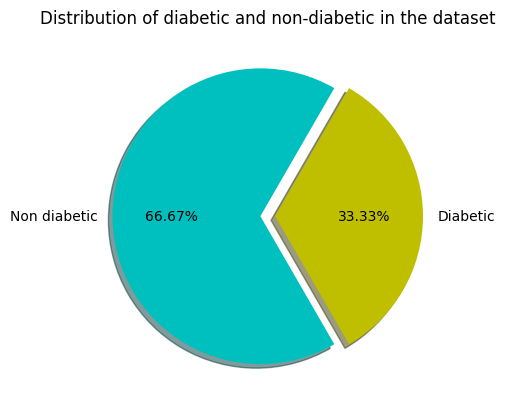

Diabetic
Non diabetic    10000
Diabetic         5000
Name: count, dtype: int64

In [69]:
plt.pie(df2.Diabetic.value_counts(),
        labels= df2.Diabetic.unique(),
        autopct='%1.2f%%',
        explode=[0.05,0.05],
        shadow =True,
       colors = ["c","y"],
       startangle=60)

plt.title("Distribution of diabetic and non-diabetic in the dataset")
plt.show()

df2.Diabetic.value_counts()


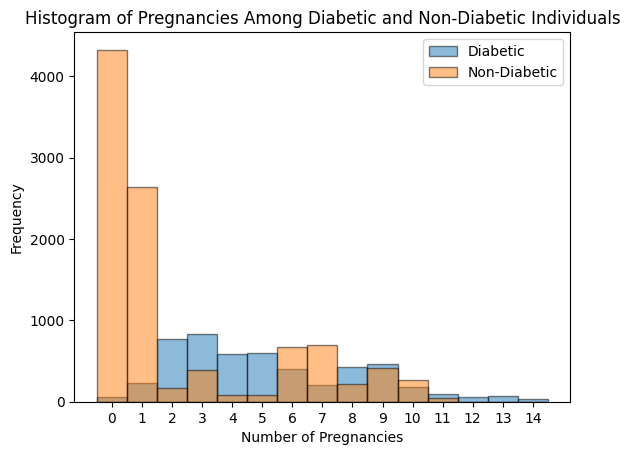

In [70]:
diabetic_data = df2[df2["Diabetic"] == "Diabetic"]
non_diabetic_data = df2[df2["Diabetic"] == "Non diabetic"]

pregnancy_values = sorted(df2["Pregnancies"].unique())
bin_edges = np.arange(min(pregnancy_values) - 0.5, 
                      max(pregnancy_values) + 1.5, 1)  # Adjust the bin edges for centering

# Plot histograms for both diabetic and non-diabetic groups
plt.hist(diabetic_data["Pregnancies"], 
         bins=bin_edges, 
         alpha=0.5, 
         label='Diabetic', 
         edgecolor='black', 
         align='mid')
plt.hist(non_diabetic_data["Pregnancies"], 
         bins=bin_edges, 
         alpha=0.5, 
         label='Non-Diabetic', 
         edgecolor='black', 
         align='mid')

plt.xticks(pregnancy_values) 
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.title('Histogram of Pregnancies Among Diabetic and Non-Diabetic Individuals')
plt.legend()
plt.show()


In [71]:
df3=df2.copy()

Categorizing BMI values and adding a new column cat_BMI to the dataset (not for cats! 😆).

In [72]:
def categorize_bmi(bmi):
    if 18.5 <= bmi <= 24.9:
        return 'normal'
    elif 25 <= bmi <= 29.9:
        return 'overweight'
    elif bmi >= 30:
        return 'obese'
    else:
        return 'underweight'

df3['cat_BMI'] = df3['BMI'].apply(categorize_bmi)
df3.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,cat_BMI
PatientID,,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,Non diabetic,obese
1147438,8,92,93,47,36,21.240576,0.158365,23,Non diabetic,normal
1640031,7,115,47,52,35,41.511523,0.079019,23,Non diabetic,obese
1883350,9,103,78,25,304,29.582192,1.282870,43,Diabetic,overweight
1424119,1,85,59,27,35,42.604536,0.549542,22,Non diabetic,obese


Categorizing SerumInsulin values and adding a new column cat_Insulin to the dataset.

In [73]:
def categorize_insulin(insulin):
    if insulin < 16:
        return 'low'
    elif 16 <= insulin <= 166:
        return 'normal'
    else:
        return 'high'
df3['cat_Insulin'] = df3['SerumInsulin'].apply(categorize_insulin)
df3.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,cat_BMI,cat_Insulin
PatientID,,,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,Non diabetic,obese,normal
1147438,8,92,93,47,36,21.240576,0.158365,23,Non diabetic,normal,normal
1640031,7,115,47,52,35,41.511523,0.079019,23,Non diabetic,obese,normal
1883350,9,103,78,25,304,29.582192,1.282870,43,Diabetic,overweight,high
1424119,1,85,59,27,35,42.604536,0.549542,22,Non diabetic,obese,normal


Categorizing DiastolicBloodPressure values and adding a new column cat_BP to the dataset.

In [74]:
def categorize_bp(bp):
    if bp < 80:
        return 'low'
    elif 80 <= bp <= 120:
        return 'normal'
    else:
        return 'high'
df3['cat_BP'] = df3['DiastolicBloodPressure'].apply(categorize_bp)
df3.head(20)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,cat_BMI,cat_Insulin,cat_BP
PatientID,,,,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,Non diabetic,obese,normal,normal
1147438,8,92,93,47,36,21.240576,0.158365,23,Non diabetic,normal,normal,normal
1640031,7,115,47,52,35,41.511523,0.079019,23,Non diabetic,obese,normal,low
1883350,9,103,78,25,304,29.582192,1.282870,43,Diabetic,overweight,high,low
1424119,1,85,59,27,35,42.604536,0.549542,22,Non diabetic,obese,normal,low
1619297,0,82,92,9,253,19.724160,0.103424,26,Non diabetic,normal,high,normal
1660149,0,133,47,19,227,21.941357,0.174160,21,Non diabetic,normal,high,low
1458769,0,67,87,43,36,18.277723,0.236165,26,Non diabetic,underweight,normal,normal
1201647,8,80,95,33,24,26.624929,0.443947,53,Diabetic,overweight,normal,normal


Categorizing PlasmaGlucose values and adding a new column cat_PlasmaGlucose to the dataset.

In [75]:
def categorize_plasma_glucose(pg):
    if pg < 140:
        return 'normal'
    elif 140 <= pg <= 199:
        return 'prediabetes'
    else:
        return 'diabetes'

# Apply the function to create a new column for categorized plasma glucose
df3['cat_PlasmaGlucose'] = df3['PlasmaGlucose'].apply(categorize_plasma_glucose)

# Display the first few rows of the dataframe
df3.head(10)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,cat_BMI,cat_Insulin,cat_BP,cat_PlasmaGlucose
PatientID,,,,,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,Non diabetic,obese,normal,normal,prediabetes
1147438,8,92,93,47,36,21.240576,0.158365,23,Non diabetic,normal,normal,normal,normal
1640031,7,115,47,52,35,41.511523,0.079019,23,Non diabetic,obese,normal,low,normal
1883350,9,103,78,25,304,29.582192,1.282870,43,Diabetic,overweight,high,low,normal
1424119,1,85,59,27,35,42.604536,0.549542,22,Non diabetic,obese,normal,low,normal
1619297,0,82,92,9,253,19.724160,0.103424,26,Non diabetic,normal,high,normal,normal
1660149,0,133,47,19,227,21.941357,0.174160,21,Non diabetic,normal,high,low,normal
1458769,0,67,87,43,36,18.277723,0.236165,26,Non diabetic,underweight,normal,normal,normal
1201647,8,80,95,33,24,26.624929,0.443947,53,Diabetic,overweight,normal,normal,normal


Categorizing TricepsThickness values and adding a new column cat_TricepsThickness to the dataset.

In [76]:
def categorize_triceps_thickness(tt):
    if tt < 12:
        return 'low'
    elif 12 <= tt <= 29:
        return 'normal'
    else:
        return 'high'

df3['cat_TricepsThickness'] = df3['TricepsThickness'].apply(categorize_triceps_thickness)

df3
#df3.groupby('Diabetic', group_keys=False).apply(lambda x: x.sample(n=7, random_state=42), include_groups=False).reset_index(drop=True)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,cat_BMI,cat_Insulin,cat_BP,cat_PlasmaGlucose,cat_TricepsThickness
PatientID,,,,,,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,Non diabetic,obese,normal,normal,prediabetes,high
1147438,8,92,93,47,36,21.240576,0.158365,23,Non diabetic,normal,normal,normal,normal,high
1640031,7,115,47,52,35,41.511523,0.079019,23,Non diabetic,obese,normal,low,normal,high
1883350,9,103,78,25,304,29.582192,1.282870,43,Diabetic,overweight,high,low,normal,normal
1424119,1,85,59,27,35,42.604536,0.549542,22,Non diabetic,obese,normal,low,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490300,10,65,60,46,177,33.512468,0.148327,41,Diabetic,obese,high,low,normal,high
1744410,2,73,66,27,168,30.132636,0.862252,38,Diabetic,obese,high,low,normal,normal
1742742,0,93,89,43,57,18.690683,0.427049,24,Non diabetic,normal,normal,normal,normal,high


Comparing the mean of each feature in each disease status.

In [77]:
piv_table = df2.pivot_table(values=['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],index="Diabetic",aggfunc="mean")

piv_table

,Age,BMI,DiabetesPedigree,DiastolicBloodPressure,PlasmaGlucose,Pregnancies,SerumInsulin,TricepsThickness
Diabetic,,,,,,,,
Diabetic,35.9952,34.414834,0.489990,73.3846,113.6462,5.1778,184.4034,31.9532
Non diabetic,27.2090,30.057052,0.353457,70.1387,104.9622,2.2479,114.5765,27.2444


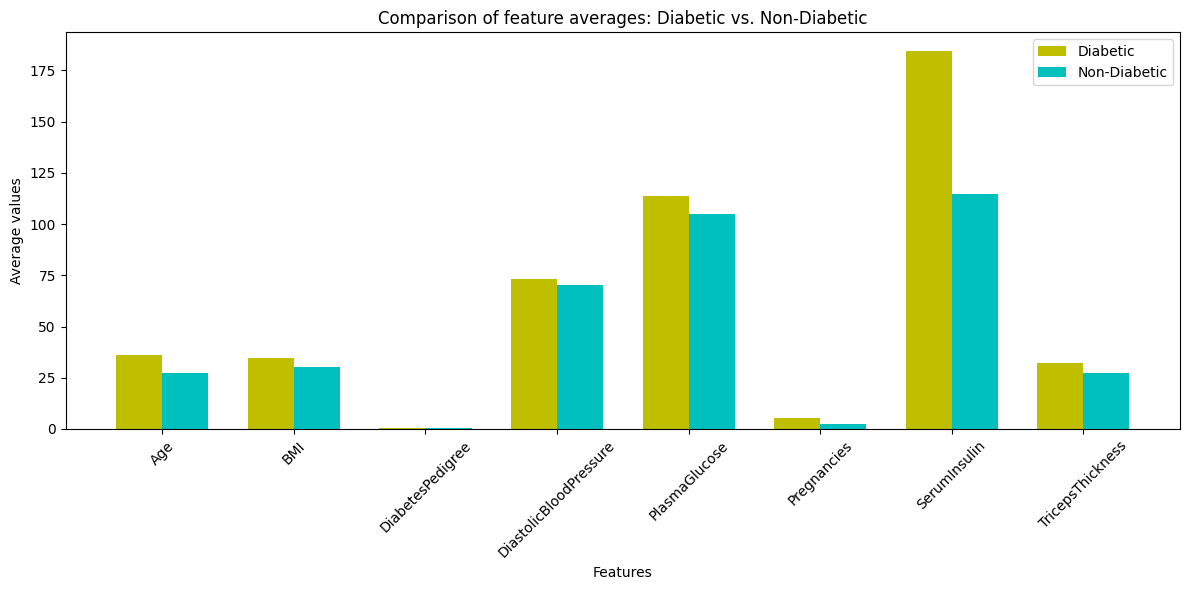

In [78]:
categories = piv_table.columns
diabetic_means = piv_table.iloc[0,:].values
non_diabetic_means = piv_table.iloc[1,:].values

# Bar chart setup
x = np.arange(len(categories))  # X-axis positions for features
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))

# Plot bars for diabetic and non-diabetic groups
plt.bar(x - width/2, 
        diabetic_means, 
        width, 
        label='Diabetic', 
        color='y')
plt.bar(x + width/2, 
        non_diabetic_means, 
        width, 
        label='Non-Diabetic',
        color='c')

# Add labels, title, and legend
plt.xlabel('Features')
plt.ylabel('Average values')
plt.title('Comparison of feature averages: Diabetic vs. Non-Diabetic')
plt.xticks(x, categories, rotation=45)  # Add feature names on x-axis
plt.legend()

plt.tight_layout()
plt.show()

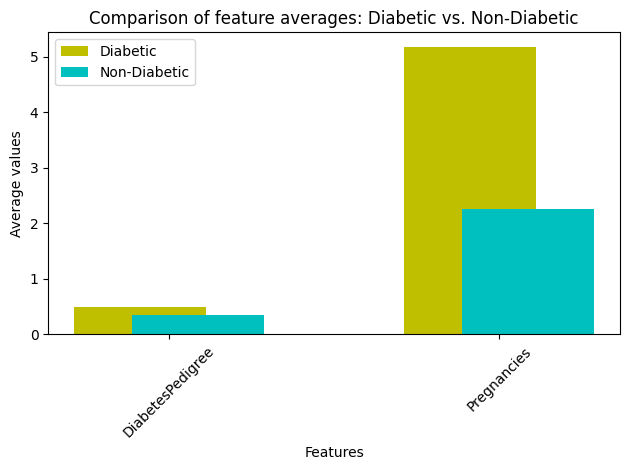

In [79]:
x_prime=x[[0,2]]

plt.bar( x_prime- width/2, 
        diabetic_means[[2,5]], 
        label='Diabetic', 
        color='y')
plt.bar(x_prime + width/2, 
        non_diabetic_means[[2,5]], 
        label='Non-Diabetic', 
        color='c')
plt.xlabel('Features')
plt.ylabel('Average values')
plt.title('Comparison of feature averages: Diabetic vs. Non-Diabetic')
plt.xticks(x_prime, categories[[2,5]], rotation=45)  # Add feature names on x-axis
plt.legend()

plt.tight_layout()
plt.show()

In [80]:
#lets see if we can see better in correlation matrix now

Text(0.5, 1.0, 'Lower triangle correlation heatmap of features')

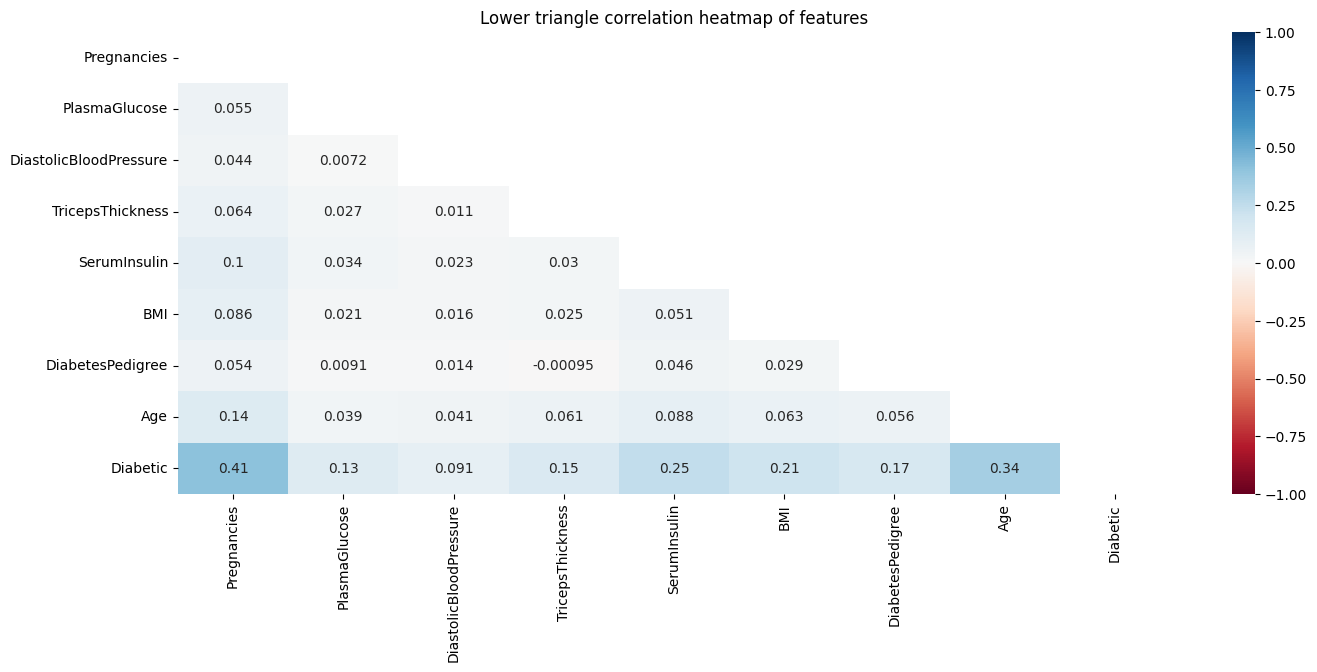

In [81]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title('Lower triangle correlation heatmap of features')

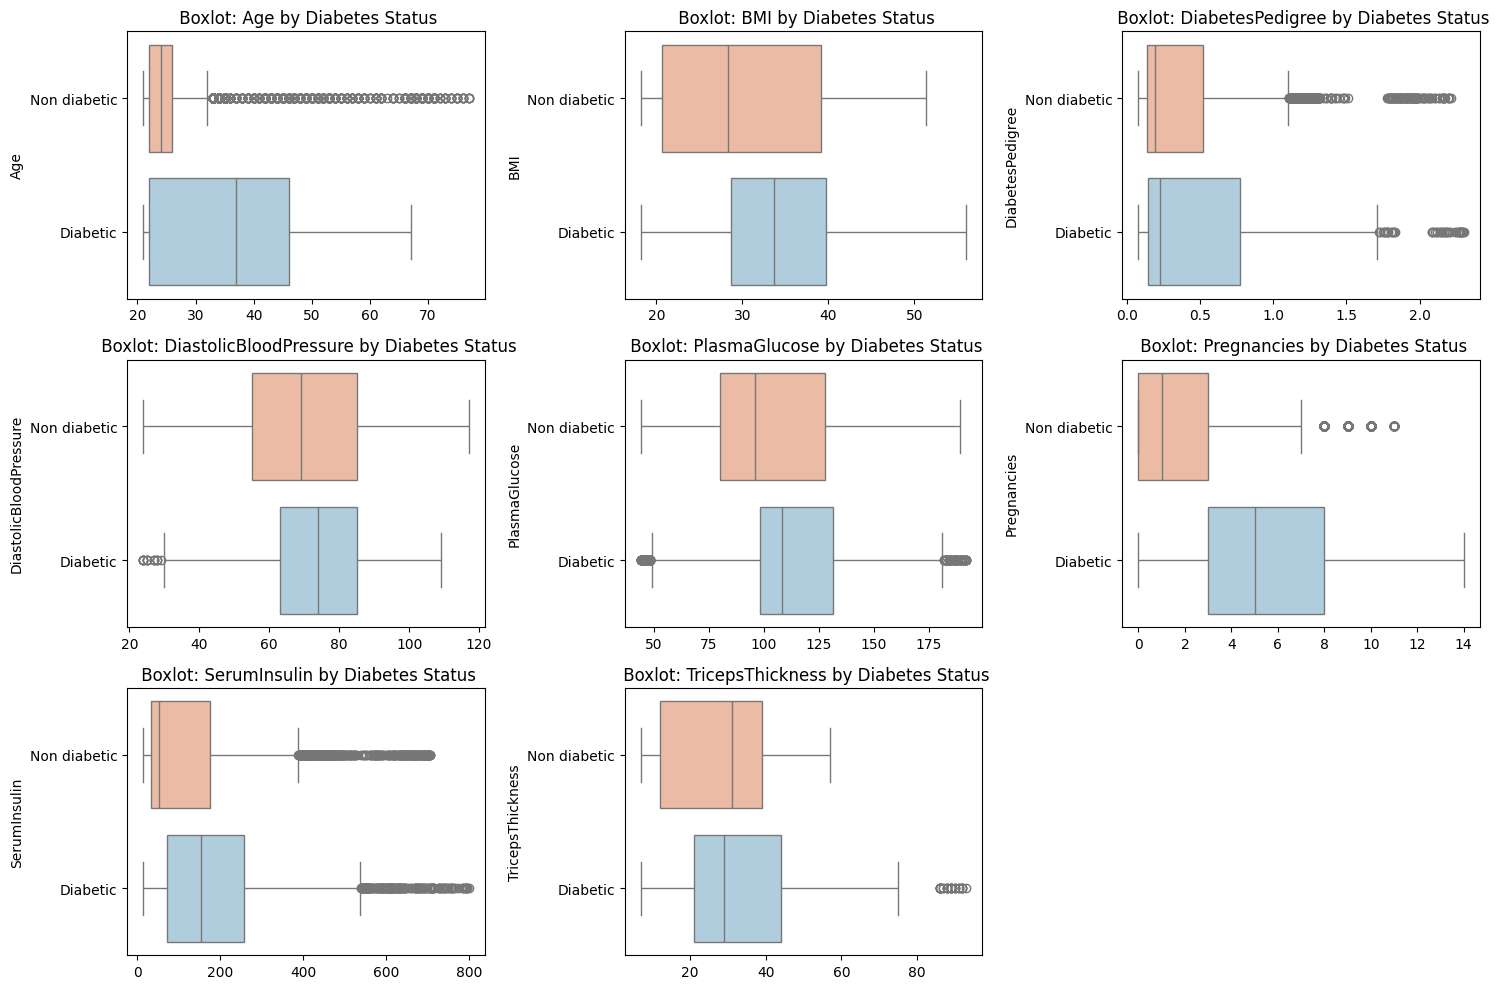

In [82]:
plt.figure(figsize=(15, 10))  
for i, feature in enumerate(categories, 1):
    plt.subplot(3, 3, i) 
    sns.boxplot(data=df2, y='Diabetic', x=feature, hue='Diabetic', palette="RdBu", legend=False)
    plt.title(f" Boxlot: {feature} by Diabetes Status")
    plt.xlabel("")
    plt.ylabel(feature)

plt.tight_layout() 
plt.show()

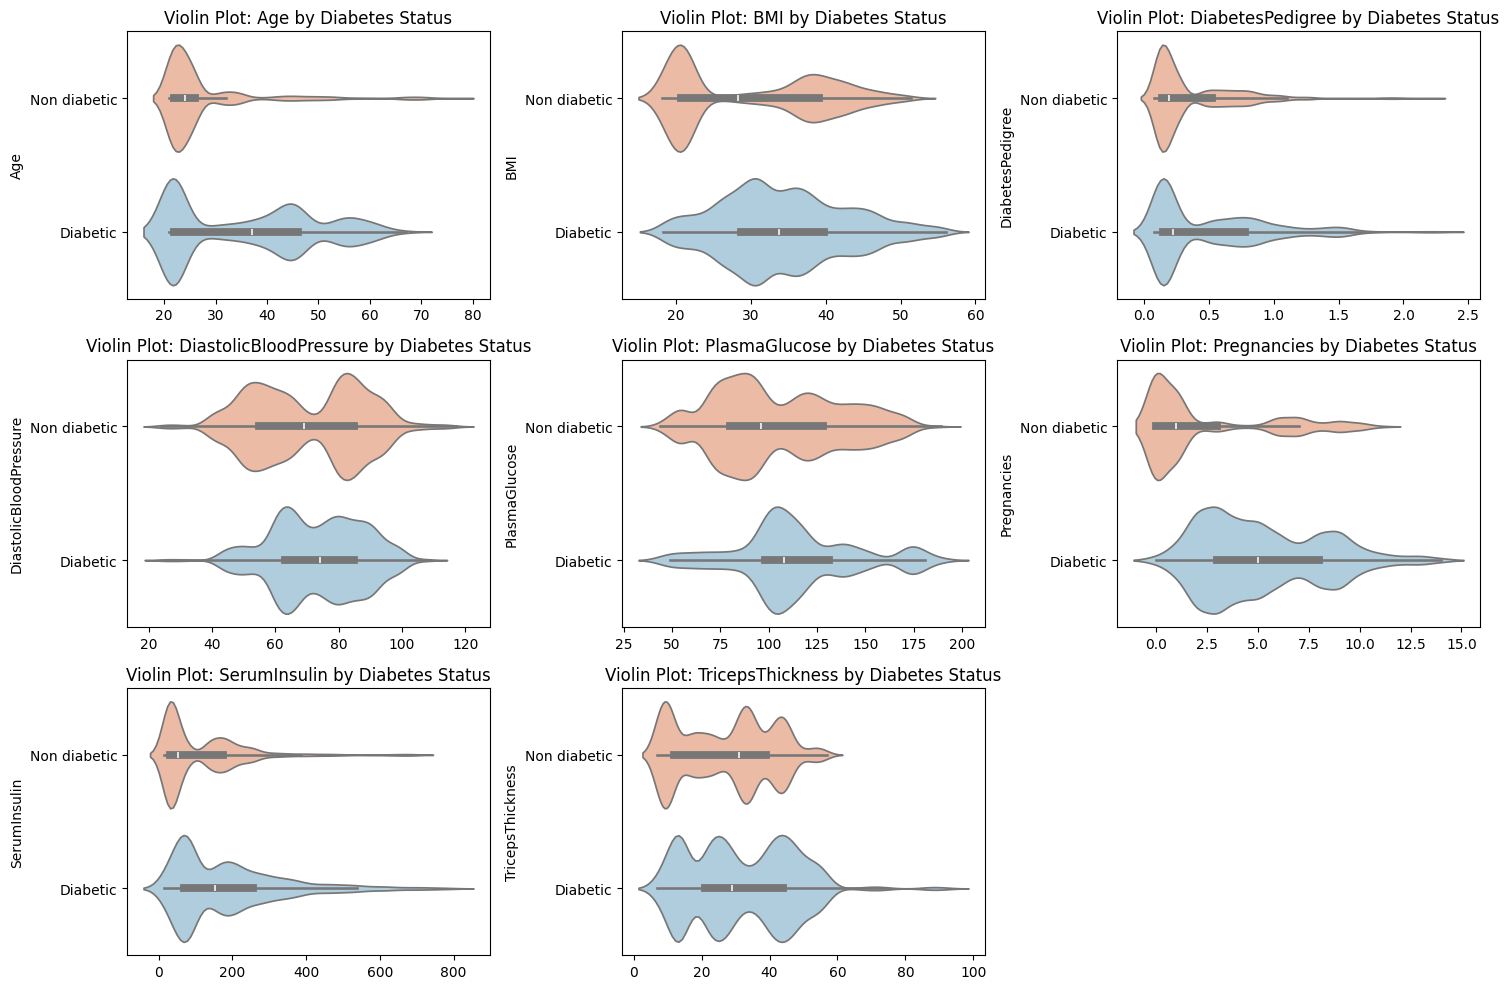

In [83]:
plt.figure(figsize=(15, 10)) 
for i, feature in enumerate(categories, 1):
    plt.subplot(3, 3, i) 
    sns.violinplot(data=df2, y='Diabetic', x=feature, hue='Diabetic', palette="RdBu", legend=False)
    plt.title(f"Violin Plot: {feature} by Diabetes Status")
    plt.xlabel("")
    plt.ylabel(feature)

plt.tight_layout()  
plt.show()

# SCALING

In [84]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Diabetic'])), 
                         columns=df.drop(columns=['Diabetic']).columns, 
                         index=df.index)

scaled_df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
PatientID,,,,,,,,
1354778,-0.950935,1.974401,0.523884,0.356298,-0.863136,1.229683,2.154424,-0.755853
1147438,1.408315,-0.495823,1.299626,1.249448,-0.765438,-1.052302,-0.636632,-0.590417
1640031,1.113409,0.223356,-1.445306,1.592967,-0.772953,1.024922,-0.846581,-0.590417
1883350,1.703222,-0.151868,0.404539,-0.262036,1.248633,-0.197512,2.338793,1.063938
1424119,-0.656029,-0.714703,-0.729237,-0.124629,-0.772953,1.136926,0.398417,-0.673135


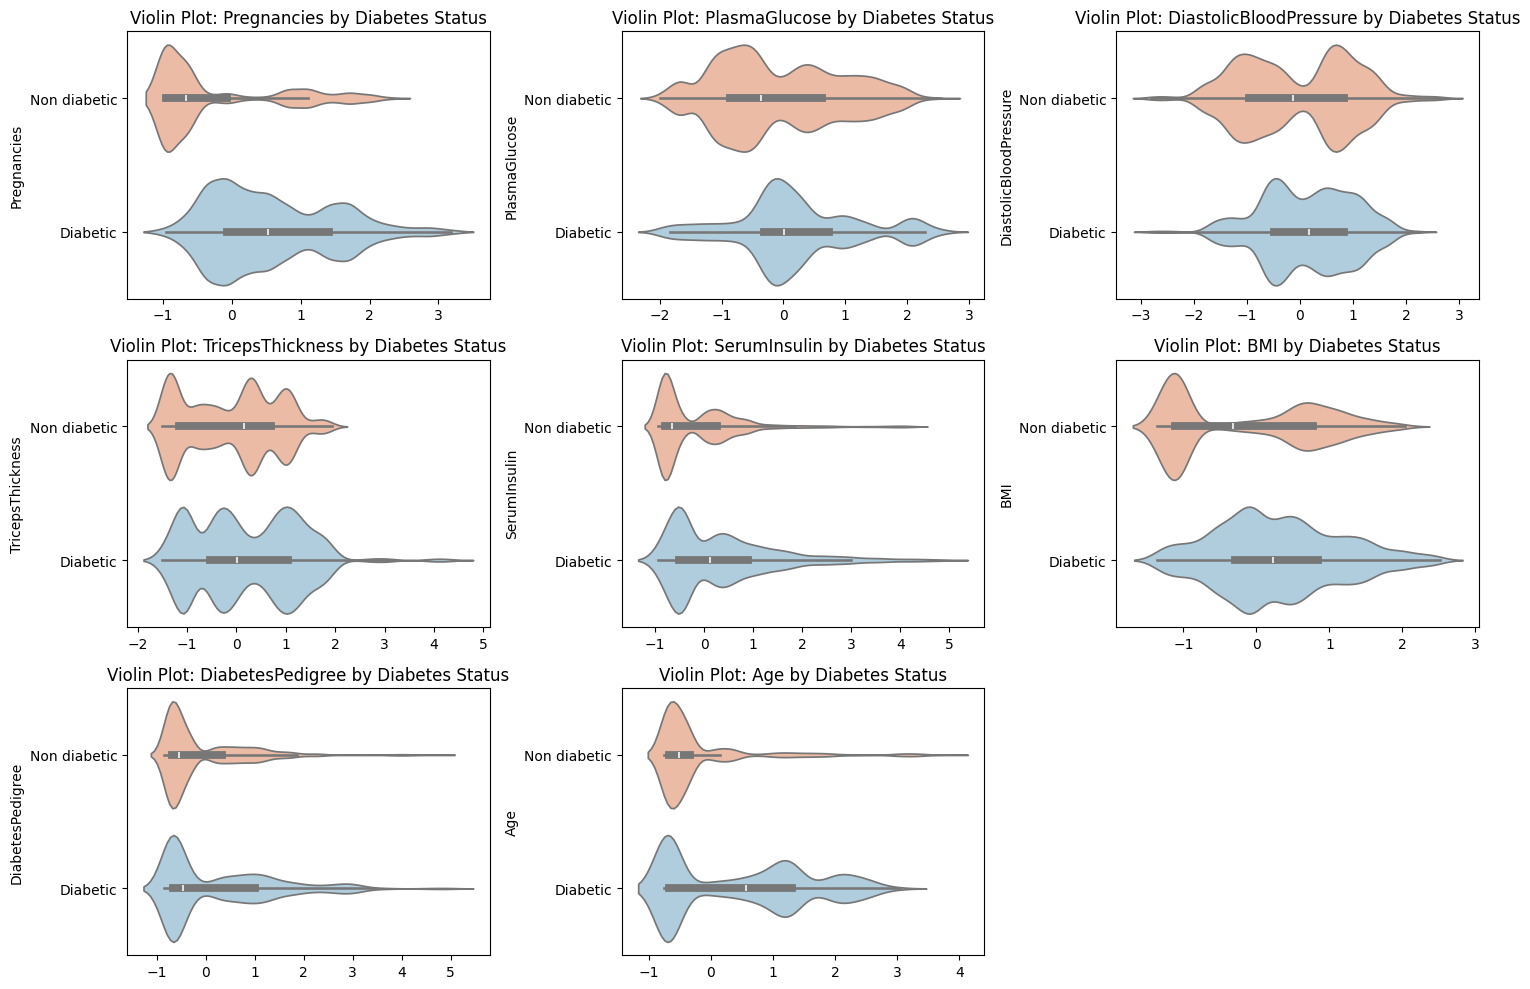

In [85]:
# Displaying the distribution of the  scaled data
plt.figure(figsize=(15, 10)) 
for i, feature in enumerate(scaled_df.columns, 1):
    plt.subplot(3, 3, i) 
    sns.violinplot(data=scaled_df, y=df2['Diabetic'], x=feature, hue=df2['Diabetic'], palette="RdBu", legend=False)
    plt.title(f"Violin Plot: {feature} by Diabetes Status")
    plt.xlabel("")
    plt.ylabel(feature)

plt.tight_layout()  
plt.show()

# MODELS TRAINING

## Data splitting

In [86]:
X = scaled_df  
y = df['Diabetic'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic regression

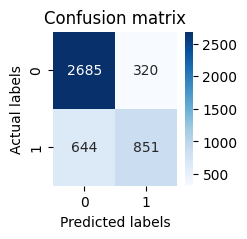


Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      3005
           1       0.73      0.57      0.64      1495

    accuracy                           0.79      4500
   macro avg       0.77      0.73      0.74      4500
weighted avg       0.78      0.79      0.78      4500


Coefficients:
 [[0.91743026 0.27913694 0.17059346 0.33980193 0.53074207 0.45943886
  0.37558231 0.69901575]]

Intercept:
 [-1.00090718]


In [87]:
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_lr)
labels = lr_model.classes_  

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion matrix')
plt.show()

print("\nLogistic Regression classification report:\n", classification_report(y_test, y_pred_lr))

print("\nCoefficients:\n", lr_model.coef_)
print("\nIntercept:\n", lr_model.intercept_)


In [88]:
lr_precision, lr_recall, lr_fscore, lr_support = precision_recall_fscore_support(y_test, y_pred_lr)

### Decison tree

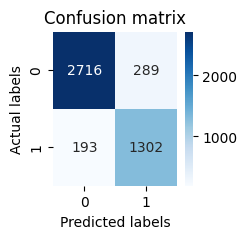


Decision tree classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      3005
           1       0.82      0.87      0.84      1495

    accuracy                           0.89      4500
   macro avg       0.88      0.89      0.88      4500
weighted avg       0.90      0.89      0.89      4500


Feature Importances:

                  Feature  Importance
0             Pregnancies    0.554377
5                     BMI    0.228715
4            SerumInsulin    0.106186
7                     Age    0.097404
1           PlasmaGlucose    0.010806
3        TricepsThickness    0.001562
6        DiabetesPedigree    0.000951
2  DiastolicBloodPressure    0.000000


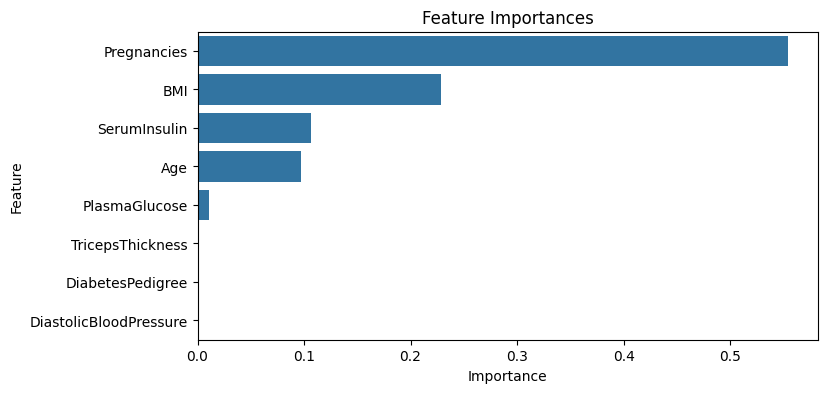

In [89]:
dt_model = DecisionTreeClassifier( max_depth=5, random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_dt)
labels = dt_model.classes_ 


plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion matrix')
plt.show()

print("\nDecision tree classification Report:\n", classification_report(y_test, y_pred_dt))

print("\nFeature Importances:\n")
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


# Optional: Plot Feature Importances
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

### Random forest

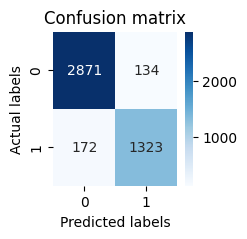


Random Foret classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3005
           1       0.91      0.88      0.90      1495

    accuracy                           0.93      4500
   macro avg       0.93      0.92      0.92      4500
weighted avg       0.93      0.93      0.93      4500


Feature Importances:

                  Feature  Importance
0             Pregnancies    0.345571
5                     BMI    0.180496
7                     Age    0.176082
4            SerumInsulin    0.111852
1           PlasmaGlucose    0.087922
3        TricepsThickness    0.039675
2  DiastolicBloodPressure    0.033140
6        DiabetesPedigree    0.025262


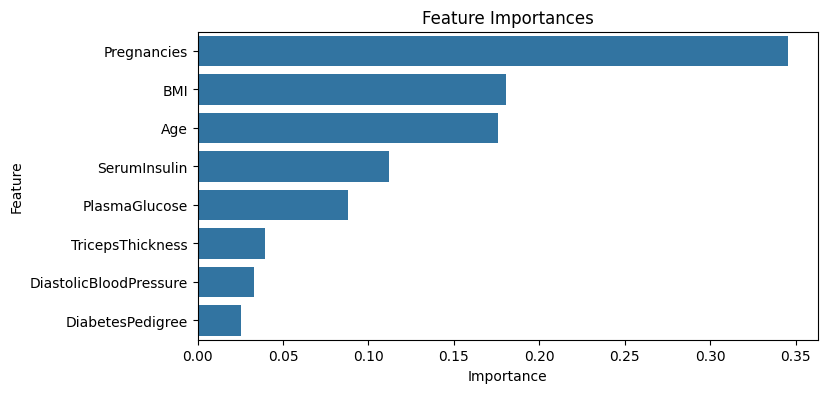

In [90]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
labels = rf_model.classes_ 

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion matrix')
plt.show()

print("\nRandom Foret classification report:\n", classification_report(y_test, y_pred_rf))

print("\nFeature Importances:\n")
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

#### Saving the models

In [91]:
os.makedirs("../models", exist_ok=True)

joblib.dump(rf_model, "../models/random_forest_model.pkl")
joblib.dump(dt_model, "../models/decision_tree_model.pkl")
joblib.dump(lr_model, "../models/logistic_regression_model.pkl")

['../models/logistic_regression_model.pkl']

### Graph results of metrics of the 3 models

In [92]:
metrics = ["Precision", "Recall", "F1-Score", "Accuracy"]
models = ["Logistic Regression", "Decision Tree", "Random Forest"]

#logistic regression metrics

lr_precision = precision_score(y_test, y_pred_lr, average='macro')
lr_recall = recall_score(y_test, y_pred_lr, average='macro')
lr_f1 = f1_score(y_test, y_pred_lr, average='macro')
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# decision tree metrics

dt_precision = precision_score(y_test, y_pred_dt, average='macro')
dt_recall = recall_score(y_test, y_pred_dt, average='macro')
dt_f1 = f1_score(y_test, y_pred_dt, average='macro')
dt_accuracy = accuracy_score(y_test, y_pred_dt)


#random forest metrics

rf_precision = precision_score(y_test, y_pred_rf, average='macro')
rf_recall = recall_score(y_test, y_pred_rf, average='macro')
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
rf_accuracy = accuracy_score(y_test, y_pred_rf)


lr_values = [lr_precision, lr_recall, lr_f1, lr_accuracy]
dt_values = [dt_precision, dt_recall, dt_f1, dt_accuracy]
rf_values = [rf_precision, rf_recall, rf_f1, rf_accuracy]


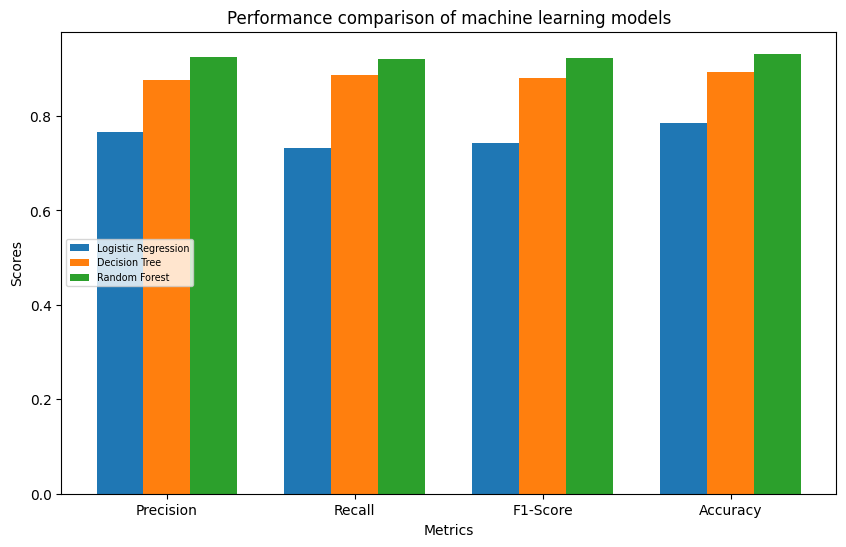

In [93]:
metric_values = np.array([lr_values, dt_values, rf_values])
x = np.arange(len(metrics)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width, metric_values[0], width, label="Logistic Regression")
ax.bar(x, metric_values[1], width, label="Decision Tree")
ax.bar(x + width, metric_values[2], width, label="Random Forest")
ax.set_xlabel("Metrics")
ax.set_ylabel("Scores")
ax.set_title("Performance comparison of machine learning models")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='center left',fontsize ="x-small")


plt.show()

In [94]:
cv_f1_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_macro')
cv_accuracy_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print Cross-validation results
print("Cross-Validation Results:")
print("-" * 80)
print("F1 Macro Scores:", cv_f1_scores)
print("Mean F1 Score:", np.mean(cv_f1_scores))
print("F1 Score Standard Deviation:", np.std(cv_f1_scores))

print("\nAccuracy Scores:", cv_accuracy_scores)
print("Mean Accuracy:", np.mean(cv_accuracy_scores))
print("Accuracy Standard Deviation:", np.std(cv_accuracy_scores))

Cross-Validation Results:
--------------------------------------------------------------------------------
F1 Macro Scores: [0.92426502 0.93176299 0.92188065 0.92279409 0.93237763]
Mean F1 Score: 0.9266160757209825
F1 Score Standard Deviation: 0.004522070085730203

Accuracy Scores: [0.93366667 0.93966667 0.931      0.93166667 0.94033333]
Mean Accuracy: 0.9352666666666666
Accuracy Standard Deviation: 0.003968766950969921


## PIMA dataset exploration

In [95]:
# Visualising the PIMA dataset distributions using violin plots
pima = pd.read_csv(r"C:\Users\afand\Desktop\diabetes-prediction\data\PIMA_diabetes.csv")
pima['Outcome'] = pima['Outcome'].replace({0: 'Non-Diabetic', 1: 'Diabetic'})

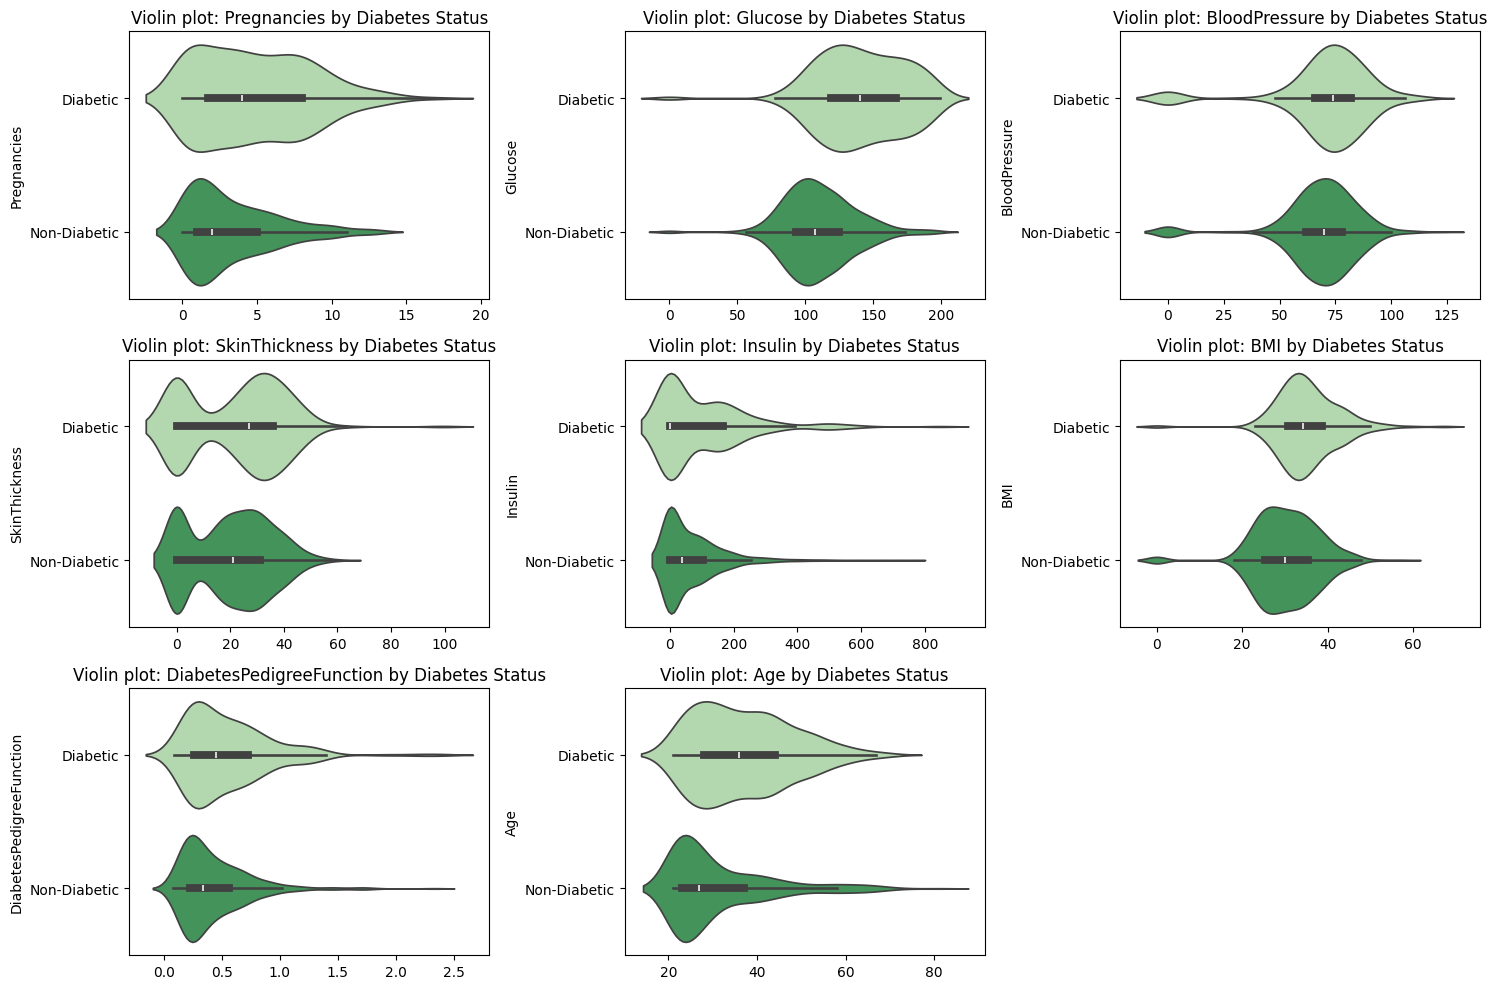

In [96]:
plt.figure(figsize=(15, 10)) 
for i, feature in enumerate(pima.drop(columns=["Outcome"]).columns, 1):
    plt.subplot(3, 3, i) 
    sns.violinplot(data=pima, y=pima["Outcome"], x=feature, hue=pima["Outcome"], palette="Greens", legend=False)
    plt.title(f"Violin plot: {feature} by Diabetes Status")
    plt.xlabel("")
    plt.ylabel(feature)

plt.tight_layout()  
plt.show()